In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony","2TB","dardel","current_bgd2","population_unit", "distance", "supercomputer", "networks")

In [3]:
repository = os.path.join("/home","jofrony","Documents","Repositories","current_bgd2", 
                          "population_unit","distance","supercomputer","networks")

In [4]:
folder = "connectivity_distance"

In [5]:
e = Experiments()

e.add_experiment(name="0_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-32_p1_p2.hdf5")

e.add_experiment(name="45_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-45-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-08_p1_p2.hdf5")  


e.add_experiment(name="90_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-90-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-31-13_p1_p2.hdf5")


In [6]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)

Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-32_p1_p2.hdf5
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31-45-3D/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-08_p1_p2.hdf5
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31-90-3D/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-31-13_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions


In [7]:
%%time
neuron_type = "dSPN"
result_dictionary = connectivity_distance_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=300)


CPU times: user 3.25 s, sys: 34.4 ms, total: 3.28 s
Wall time: 3.39 s


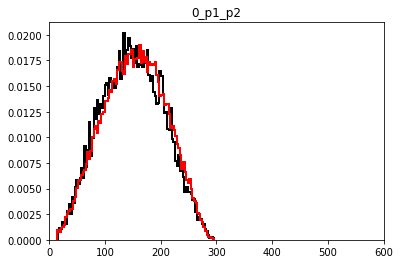

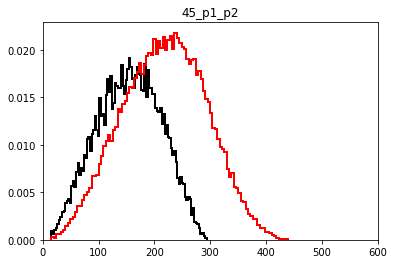

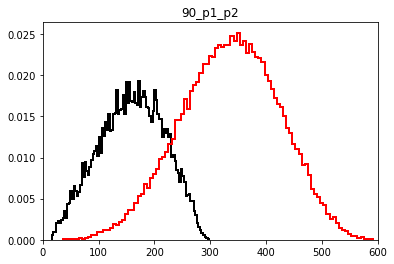

In [12]:
import numpy as np
for e in result_dictionary:
    plt.figure()
    plt.title(e)
    weights = np.ones_like(result_dictionary[e]["within"])/len(result_dictionary[e]["within"])
    plt.hist(np.array(result_dictionary[e]["within"]) * 1e6, bins=100, color="black", histtype=u'step', lw=2, weights=weights)
    weights = np.ones_like(result_dictionary[e]["between"])/len(result_dictionary[e]["between"])
    plt.hist(np.array(result_dictionary[e]["between"]) * 1e6, bins=100, color="red", histtype=u'step', lw=2, weights=weights)
    plt.xlim((0,600))
    plt.show()